# Emergency vehicle identification



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
pip install fastai

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement fastai (from versions: none)
ERROR: No matching distribution found for fastai


Note: you may need to restart the kernel to use updated packages.


In [6]:
## importing libraries
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import cv2
import os  
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD, Adam

In [7]:
from fastai.vision import *
from fastai.metrics import error_rate

ModuleNotFoundError: No module named 'fastai'

In [0]:
bs = 64

In [5]:
## input ataset from path
path = Path('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles')
path.ls()

[PosixPath('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/sample_submission.csv'),
 PosixPath('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/train.csv'),
 PosixPath('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test.csv'),
 PosixPath('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test'),
 PosixPath('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/train')]

In [0]:
## get tran dataset file using path 
path_anno = 'train'
fn_paths = get_image_files(path_anno)

In [0]:
## here get path lenght dataset values
len(fn_paths)

In [0]:
## get dataset with object and get train.csv file
train_df = pd.read_csv('train.csv')
train_df.head()

In [9]:

train_df.shape

(1646, 2)

In [10]:
## here check null values in our dataset and sum it
train_df.isnull().sum()


image_names         0
emergency_or_not    0
dtype: int64

In [11]:
## descirbe informatio about train dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.8+ KB


In [12]:
## here create function to get image dataset with condition based
def get_labels(file_path):
        for row in train_df.itertuples():
            if '/'+row.image_names in str(file_path):           
                return row.emergency_or_not

In [13]:
## create path label for iamge map
labels = list(map(get_labels, fn_paths))

In [14]:
len(labels)

1646

In [15]:
## get datafram from given dataset
tfms = get_transforms()
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=224, bs=bs, valid_pct=0.25).normalize(imagenet_stats)

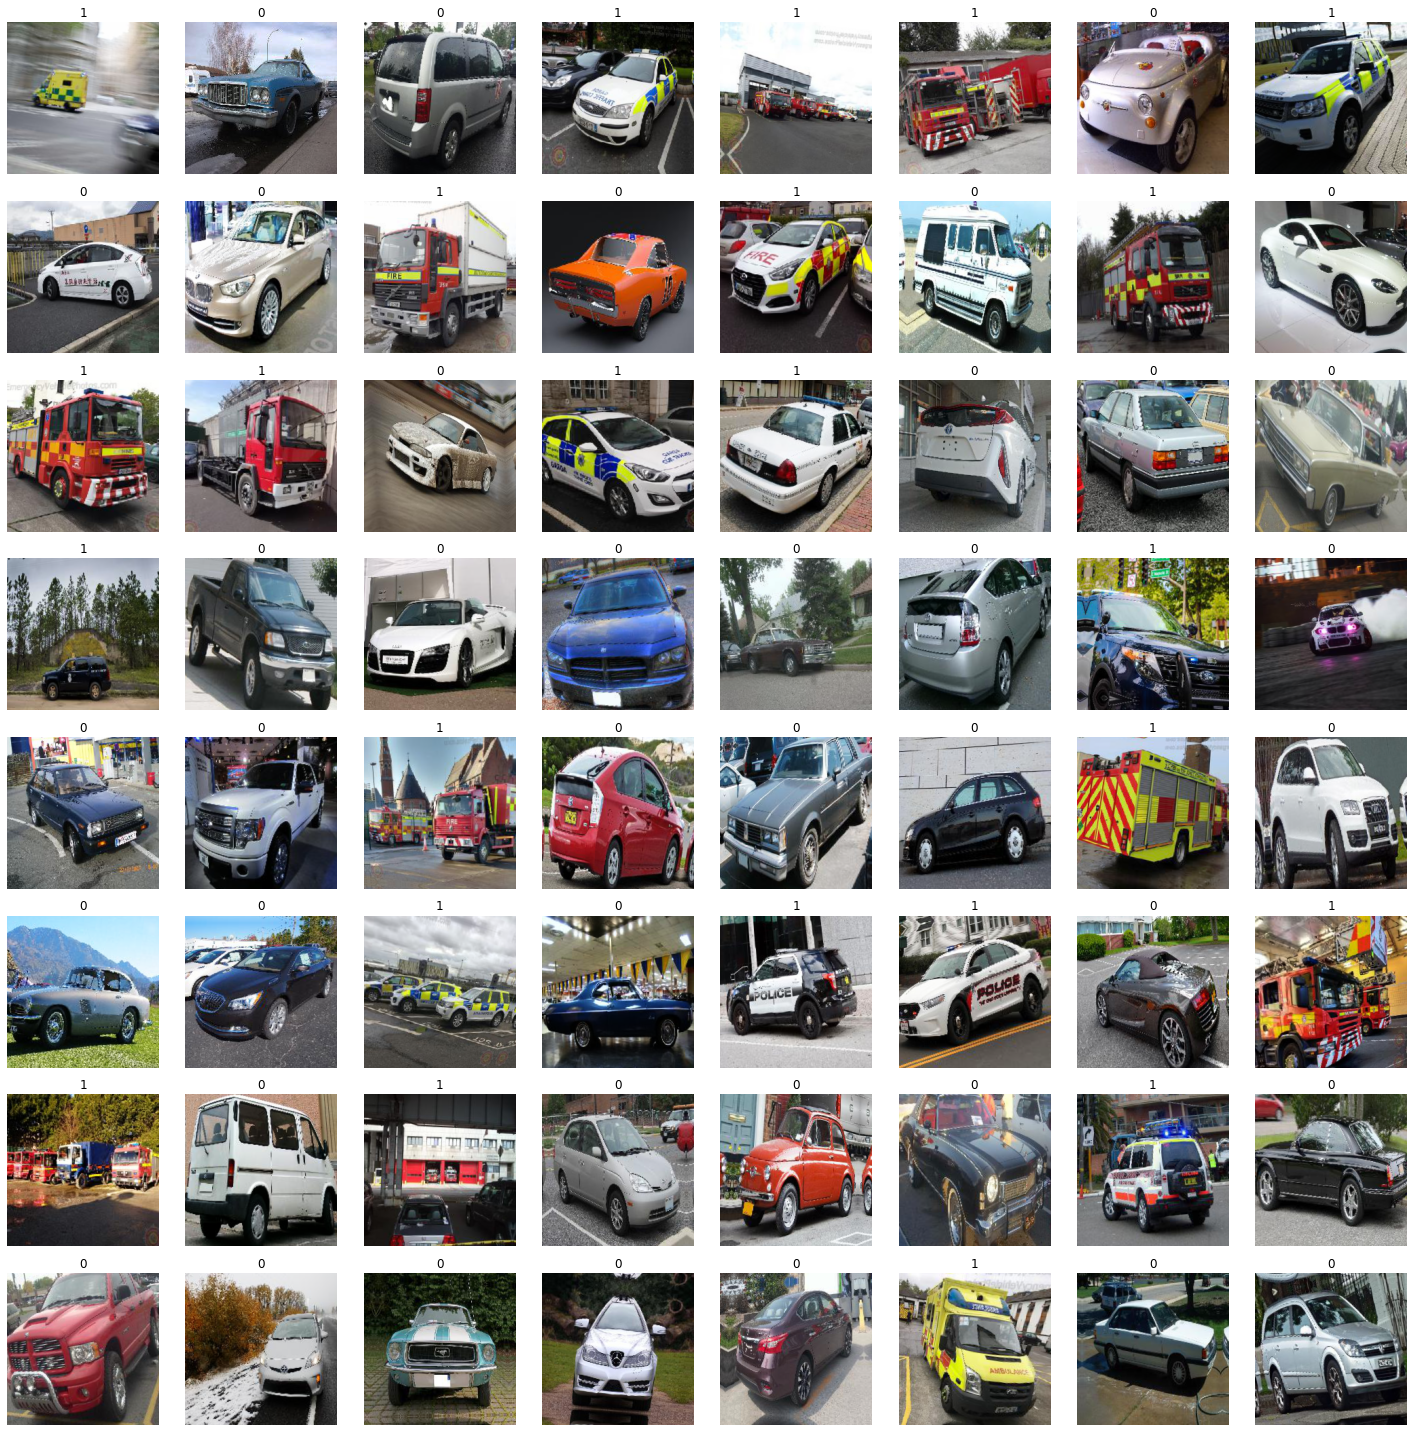

In [16]:
## get dataset from iamges where row is equal go 20 and image size is 20*20
data.show_batch(rows=20, figsize=(20,20))

In [17]:
## The code accesses properties and functions for data, including data.classes, data.c, and len(data.train_ds). It returns the length of the training dataset and the validation dataset, respectively. The code prints the values of these properties and the lengths of the training and validation datasets.
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1], 2, 1235, 411)

In [18]:
## Using Python shell commands, create a directory and copy a file from one location to another, focusing on "/root/.cache/torch/checkpoints/" and "/kaggle/input/resnet152/resnet152.pth".
mkdir -p /root/.cache/torch/checkpoints/
!cp /kaggle/input/resnet152/resnet152.pth /root/.cache/torch/checkpoints/resnet152.pth

In [19]:
## Using ResNet152 architecture, a learner object is trained on data, with metrics parameter specifying accuracy evaluation, and saved in model_dir directory.
learn = cnn_learner(data, models.resnet152, metrics=accuracy, model_dir=Path('/kaggle/input/resnet152'))

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [20]:
## HTML tags create a collapsible section with learn variable and model attribute, accessing a trained machine learning model based on the learn variable's specific functionality and purpose.
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [21]:
## The Python code is calling the cycle data
learn.fit_one_cycle(10)

In [22]:
## The given Python code learn.model_dir = '/kaggle/output/resnet152/' sets the model directory for a machine learning model. It sets the directory path to '/kaggle/output/resnet152/', which means that the model will be saved or loaded from this directory.


learn.model_dir = '/kaggle/output/resnet152/'

In [23]:
## The code saves a learned model in a file called "stage-1-152" at the specified path ("/kaggle/output/resnet152/"). This file will contain the trained weights and parameters of the ResNet152 model. The file can later be loaded to reuse the trained model for predictions.
learn.save('/kaggle/output/resnet152/stage-1-152')

In [24]:
## The code uses the ClassificationInterpretation class from the fastai library in Python to create an instance called interp and pass in a learn object. The top_losses method returns two variables: losses and idxs, representing calculated losses and indices of top loss predictions. The code checks if the lengths of data.valid_ds, losses, and idxs are equal, returning True if they are equal.
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

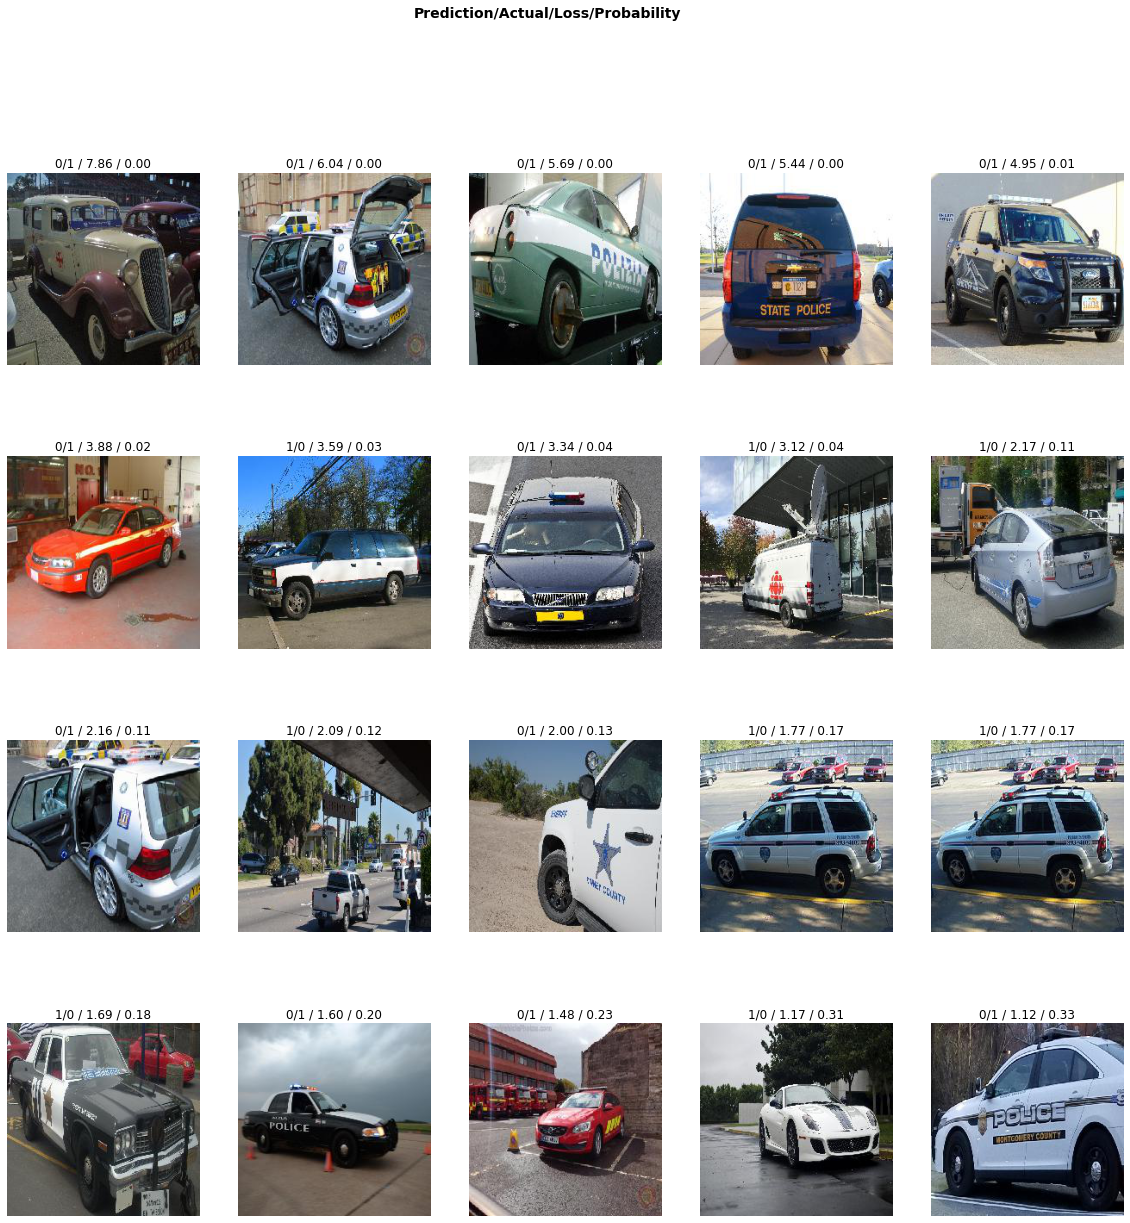

In [25]:
## The given code is using the plot_top_losses function from the interp object. This code is plotting the top 20 losses in a figure with a size of 20x20. The plot_top_losses function is likely part of a library or module being used in the notebook. It is used to visualize or analyze the top losses in a specific context, such as a machine learning model's predictions or classification task.
interp.plot_top_losses(20, figsize=(20,20))

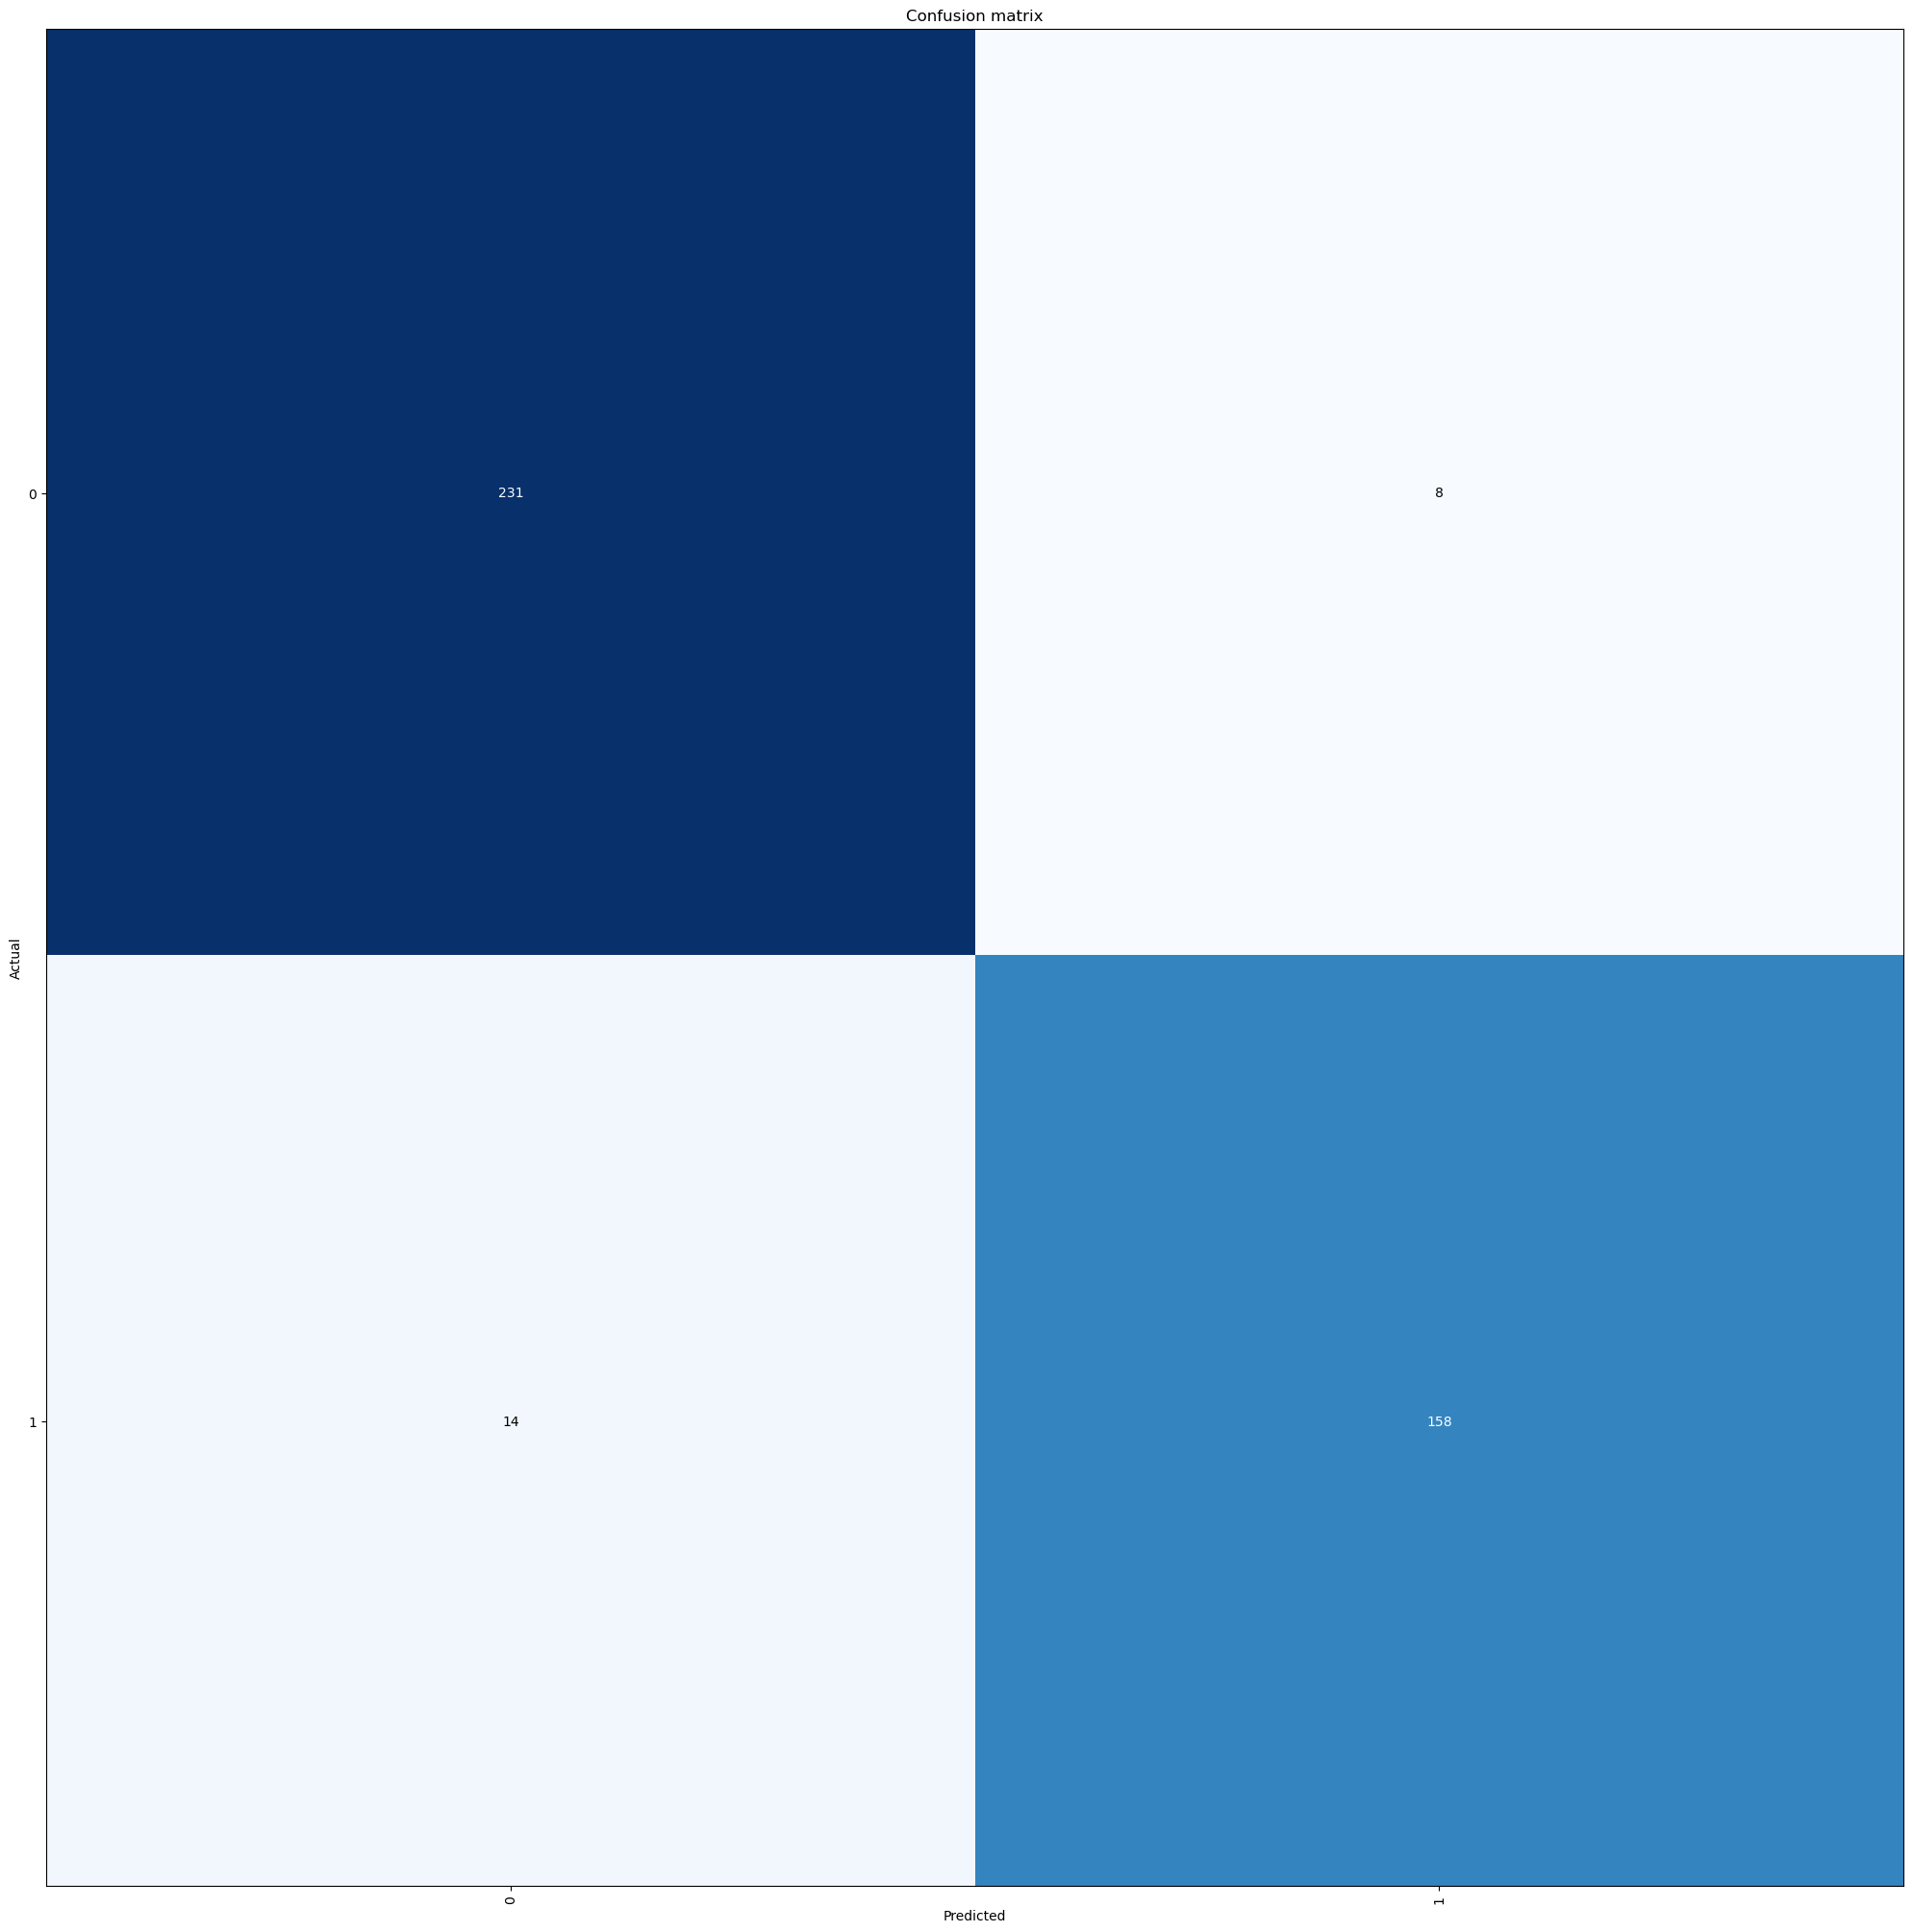

In [26]:
## This code is calling the plot_confusion_matrix function from the interp module and displaying the resulting plot. The figsize argument specifies the size of the plot, while the dpi argument specifies the resolution of the plot.


interp.plot_confusion_matrix(figsize=(20,20), dpi=100)

In [27]:
## The code you provided is asking for the "most confused" words in the "interp" object, with a minimum frequency of 2. However, without any additional context or information about the "interp" object or the code preceding this snippet, it is difficult to provide a more specific explanation.
interp.most_confused(min_val=2)

[(1, 0, 14), (0, 1, 8)]

In [28]:
## The line learn.unfreeze() is calling the unfreeze() method on an object named learn.
learn.unfreeze()

In [29]:
## The code is using the method fit_one_cycle from a machine learning library called fastai. It is being called on an object named learn, which is presumably an instance of a machine learning model. 
learn.fit_one_cycle(10)

In [30]:
## The code is attempting to load a pre-trained model called "stage-1-152" from a file located at '/kaggle/output/resnet152'. The model is loaded using the load function from the learn object.
learn.load('/kaggle/output/resnet152/stage-1-152');

In [31]:
## The Python code learn.lr_find() is using the learn object to call the lr_find() method. This code is likely part of a machine learning library such as fastai or PyTorch.
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


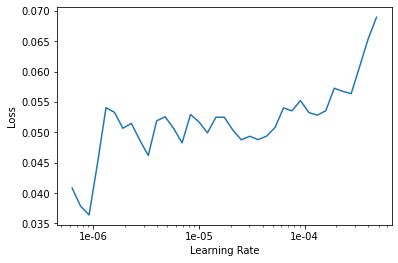

In [32]:
## The code learn.recorder.plot() is using the plot() function from the recorder attribute of the learn object.
learn.recorder.plot()

In [33]:
## The code snippet provided is a call to two methods from a library called learn.
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

In [34]:
## The ClassificationInterpretation class is being used as a constructor to create an object called interp. interp is being created by calling the from_learner method of ClassificationInterpretation and passing in the object learn. learn is assumed to be an instance of a trained learner.
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

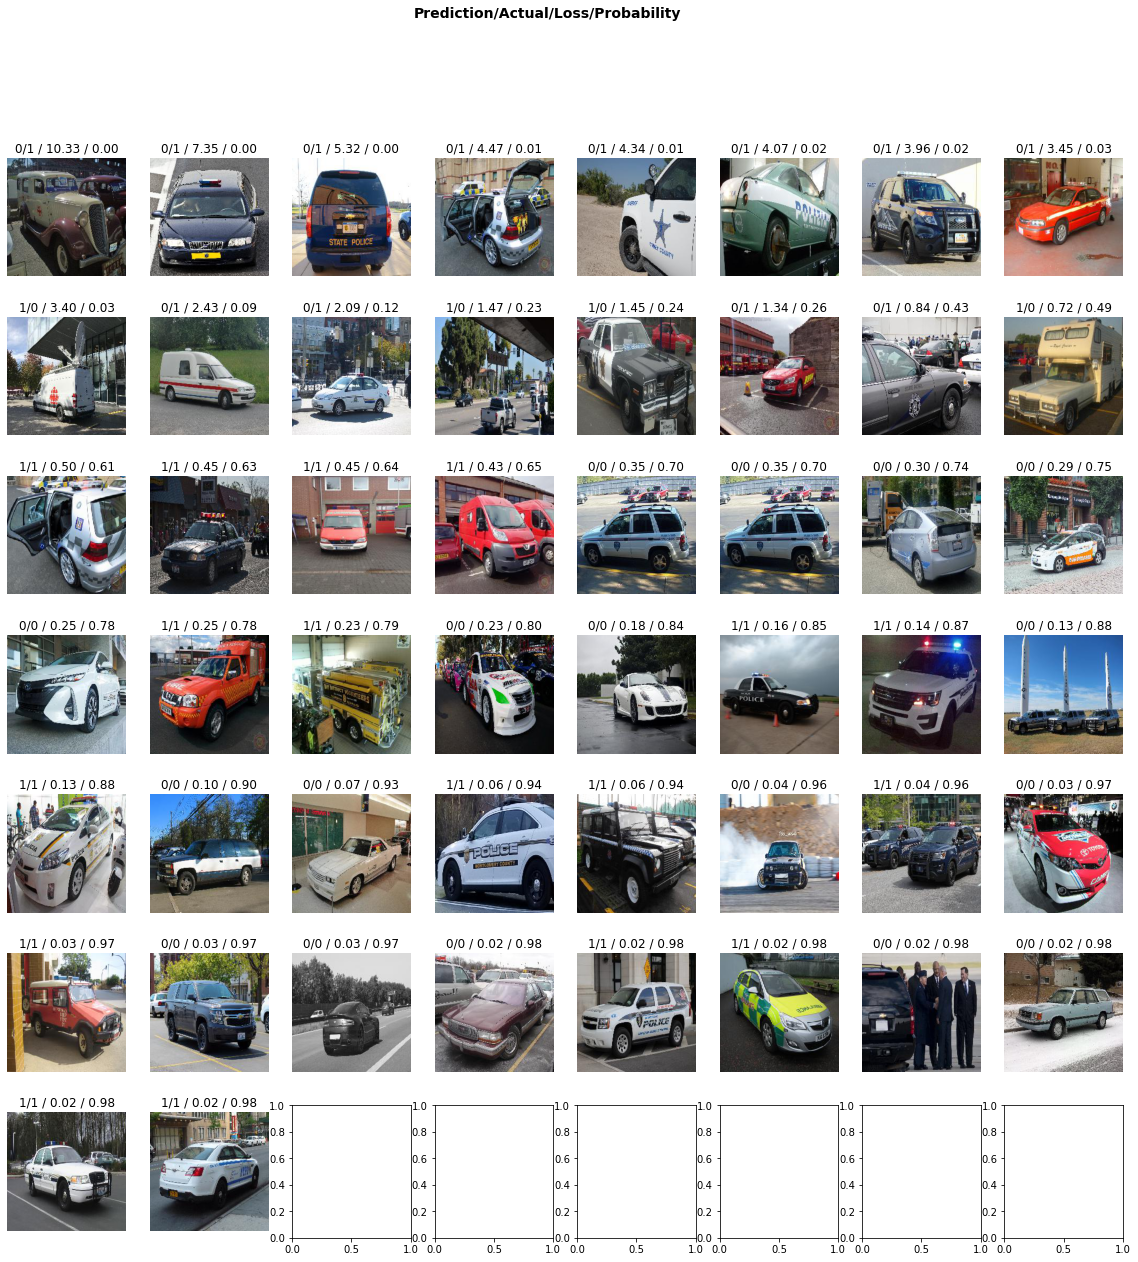

In [35]:
## The code snippet you provided is calling the plot_top_losses function with two arguments: the number 50 and a tuple figsize with two values: 20 and 20. This code is likely used to visualize the top losses in a machine learning model during training or evaluation. The plot_top_losses function is part of the interp object or module, but without further context, it is difficult to determine what library or package it belongs to. The resulting plot is displayed in the Jupyter notebook with the specified figure size.
interp.plot_top_losses(50, figsize=(20,20))

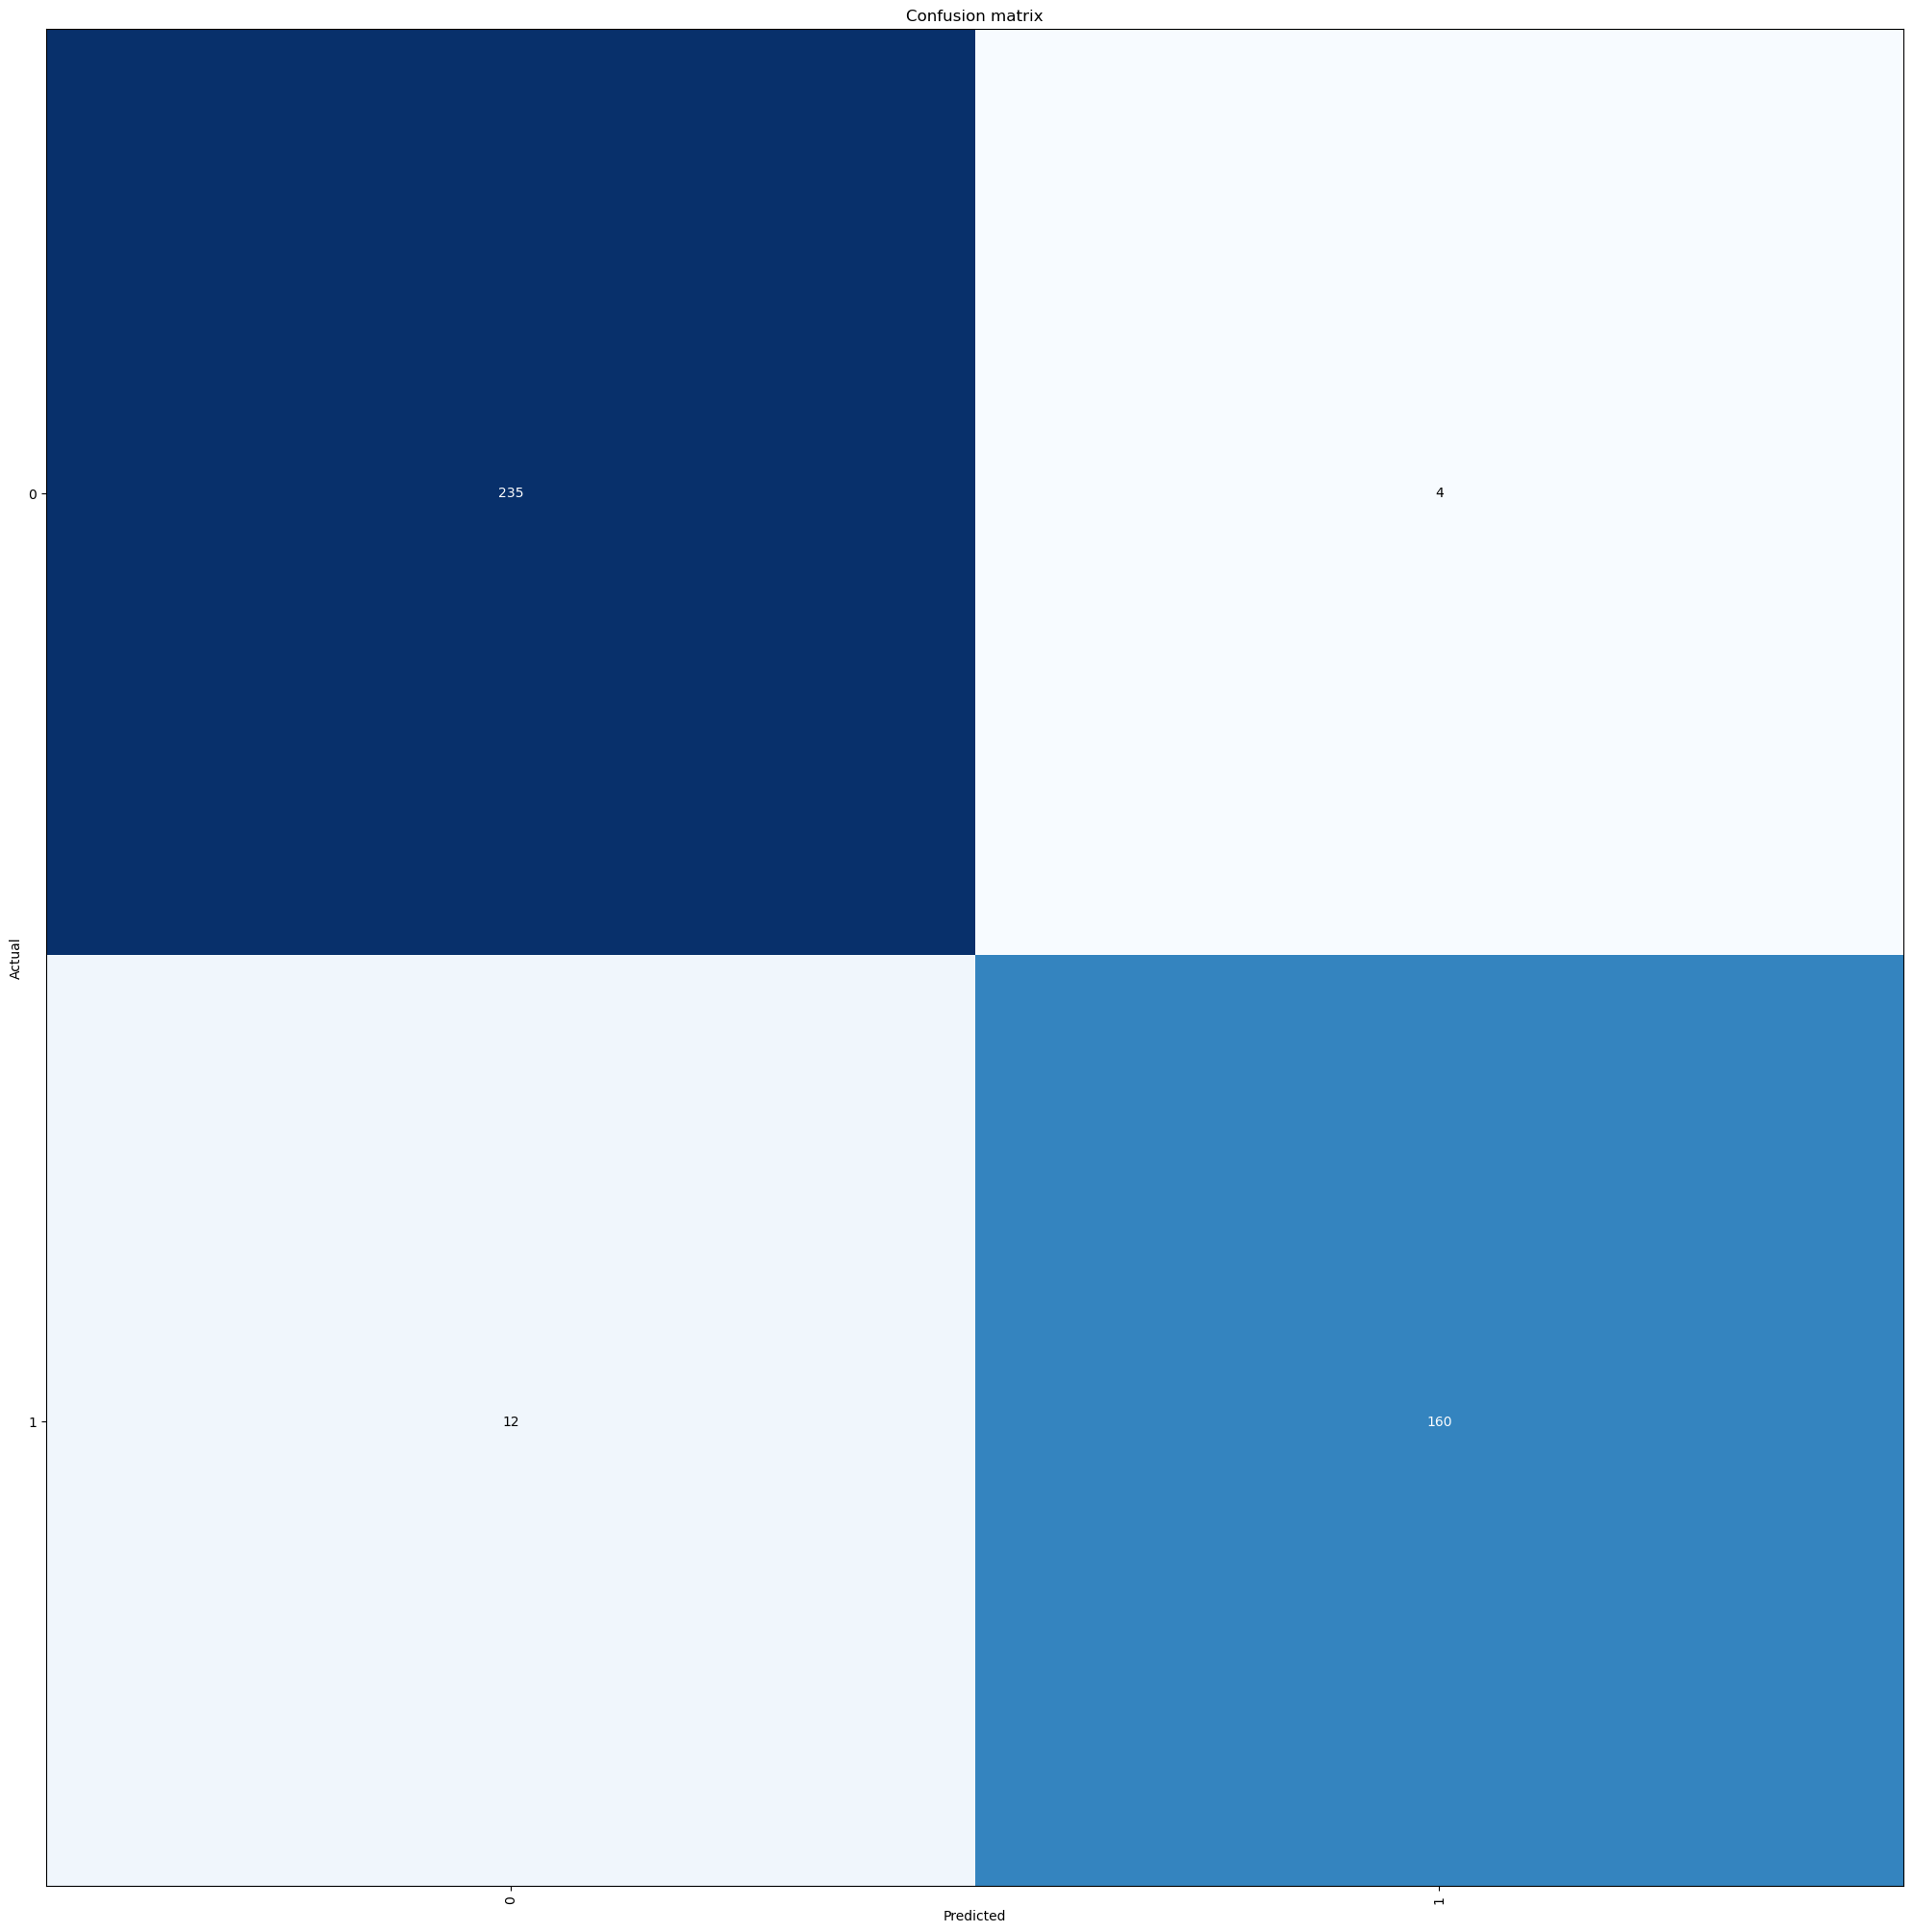

In [36]:
## The code snippet is calling a function plot_confusion_matrix() from the interp module to generate and display a confusion matrix plot. The figsize argument is used to set the size of the figure, and the dpi argument sets the resolution of the plot.
interp.plot_confusion_matrix(figsize=(20,20), dpi=100)

In [37]:
## The code interp.most_confused(min_val=1) is calling the method most_confused() on an object named interp. This method is likely defined in a class or module that has been imported into the notebook. The most_confused() method is being passed a keyword argument min_val with a value of 1.
interp.most_confused(min_val=1)

[(1, 0, 12), (0, 1, 4)]

In [38]:
## This code saves the trained model using the save function from the learn object. The saved model will be stored at the specified path /kaggle/output/resnet152/stage-2-152. The file will represent the model at the second training stage using the ResNet-152 architecture.
learn.save('/kaggle/output/resnet152/stage-2-152')

In [39]:
path = learn.path

In [40]:
learn.export('/kaggle/output/resnet152/emergency_vehicles.pkl')

In [41]:
defaults.device = torch.device('cpu')

In [42]:
lego_learn = load_learner('/kaggle/output/resnet152', 'emergency_vehicles.pkl')

In [43]:
pred_path = path/'test'
pred_fn_paths = get_image_files(pred_path)

In [44]:
for pred_fn_path in pred_fn_paths:
    img = open_image(pred_fn_path)
    pred_class,pred_idx,outputs = learn.predict(img)
    print(pred_fn_path, pred_class)

/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1269.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/2008.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/208.jpg 1
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1789.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1411.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1501.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/2021.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/1385.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/2278.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/56.jpg 1
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/20.jpg 0
/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/275.jpg 1
/kaggle/in

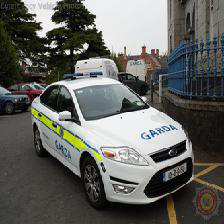

In [45]:
## The code snippet is opening an image file named '925.jpg' using the open_image() function from the 'fastai.vision' module. The image file is located in the directory '/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/'. The open_image() function reads and returns the image object, which is then displayed in the Jupyter notebook.


img = open_image('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/925.jpg')
img

In [46]:
## The predict method of lego_learn takes in an image as input and returns the predicted class, the index of the predicted class, and the outputs of the model.
pred_class,pred_idx,outputs = lego_learn.predict(img)
print(str(pred_class))

1


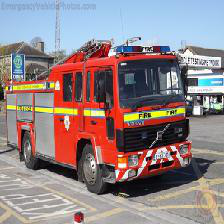

In [47]:
img = open_image('/kaggle/input/emergency-vehicles-identification/Emergency_Vehicles/test/927.jpg')
img

In [48]:
pred_class,pred_idx,outputs = lego_learn.predict(img)
print(str(pred_class))

1
